In [1]:
from jyquickhelper import add_notebook_menu

add_notebook_menu(first_level=1,
                  last_level=4,
                  header="<font color='blus'>Data access and OOP</font>")

# First glance of dataset

In [2]:
#Go through the "employee.csv" usind Notepad++》

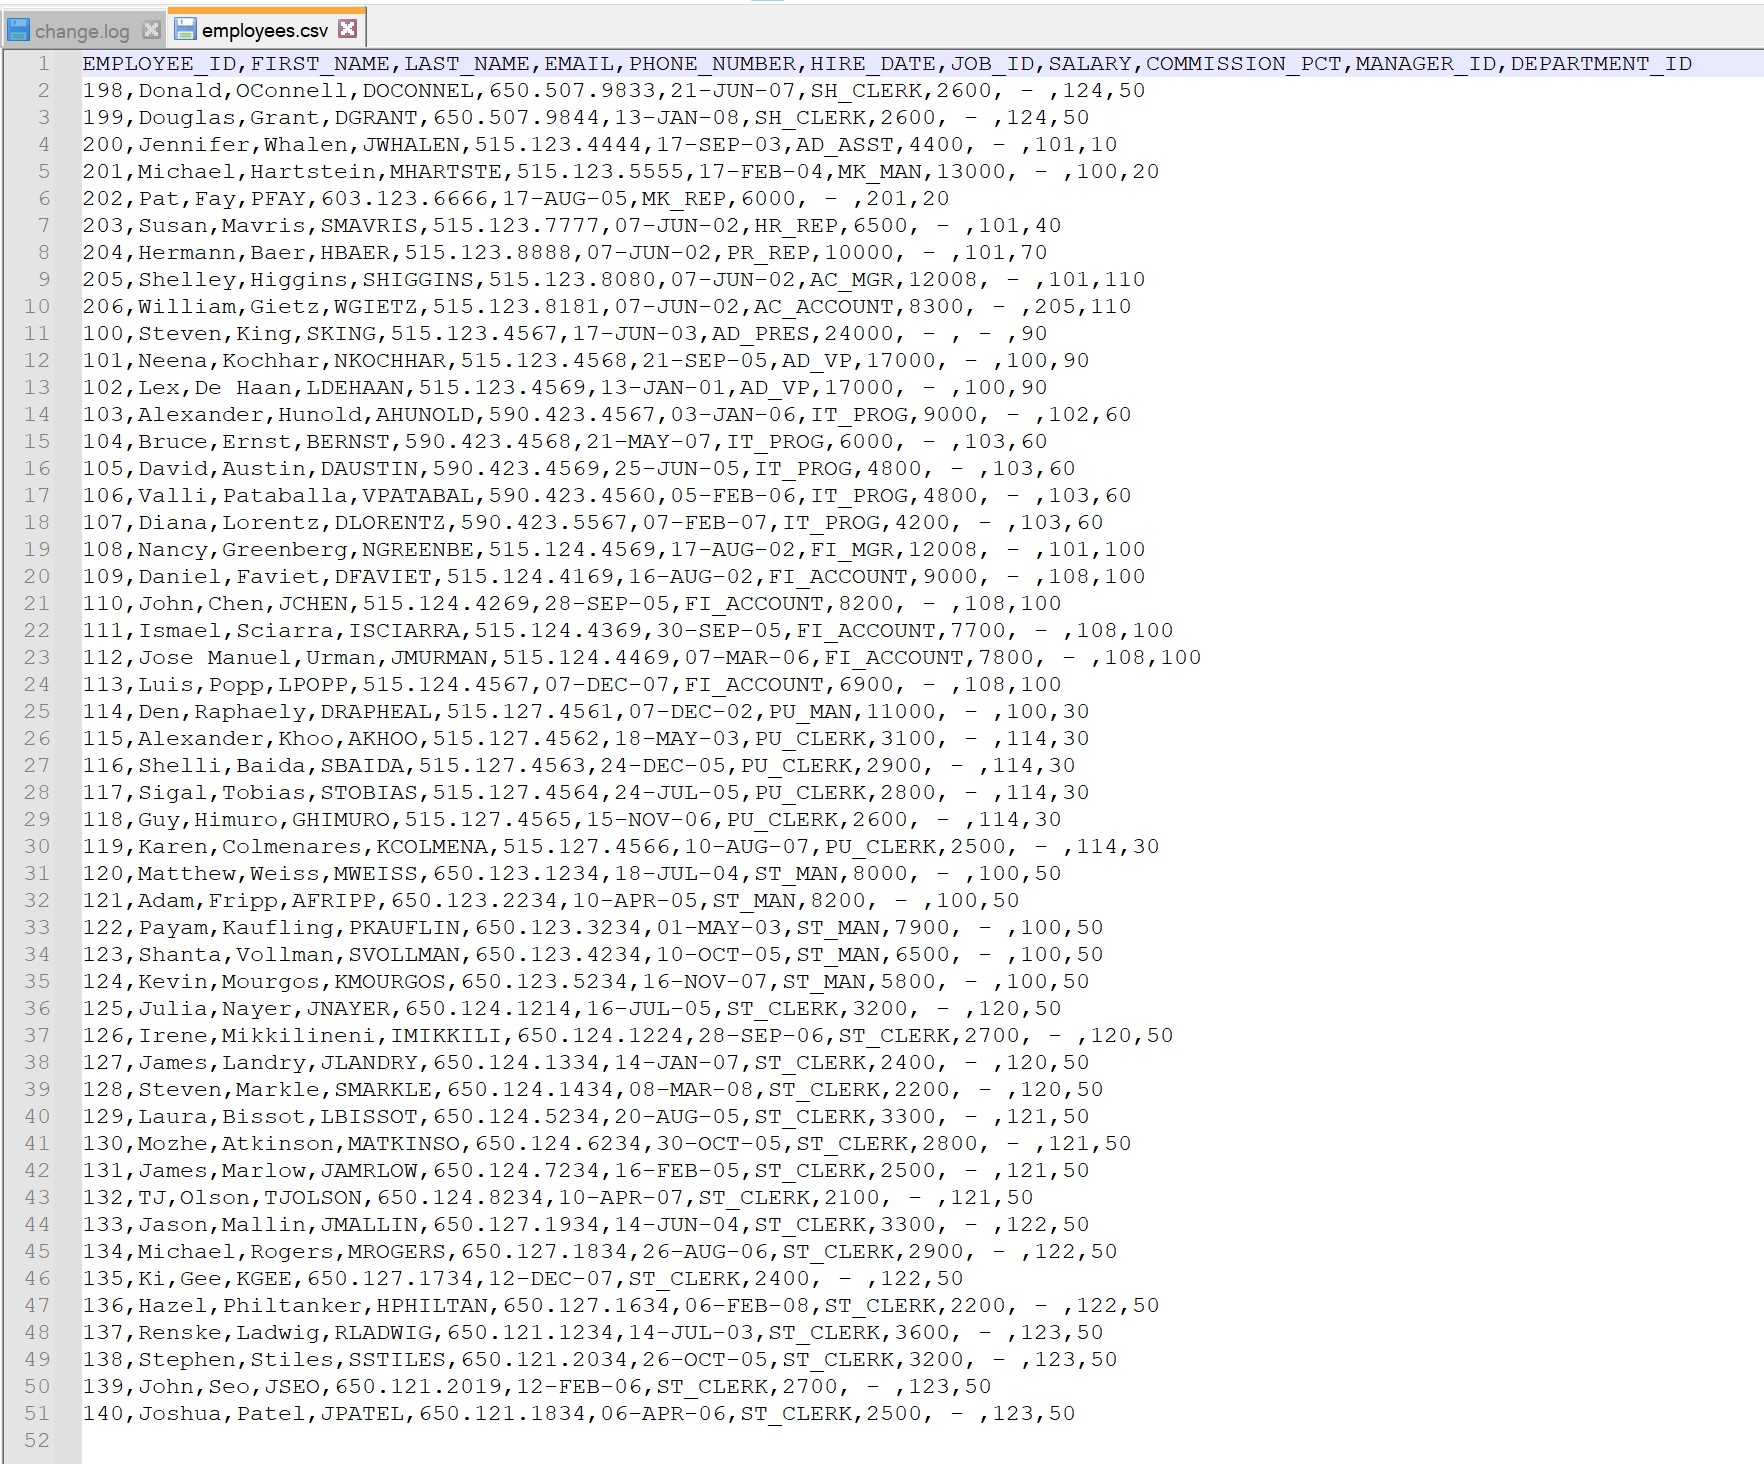

In [3]:
#11 variables and 50 records with a header
#Delimeter is ',' mixed data type with int, str, float, date, phone number an empty column Commision PCT

# Import dataset and packages

In [58]:
#Packages
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
import numpy as np
import itertools
from collections import Counter
import random

#Import the file
df = pd.read_csv('employees.csv',index_col = 0)

# Understand the dataset

In [19]:
#Show first 5 rows
df.head()

,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
EMPLOYEE_ID,,,,,,,,,,
198,Donald,OConnell,DOCONNEL,650.507.9833,21-JUN-07,SH_CLERK,2600,-,124,50
199,Douglas,Grant,DGRANT,650.507.9844,13-JAN-08,SH_CLERK,2600,-,124,50
200,Jennifer,Whalen,JWHALEN,515.123.4444,17-SEP-03,AD_ASST,4400,-,101,10
201,Michael,Hartstein,MHARTSTE,515.123.5555,17-FEB-04,MK_MAN,13000,-,100,20
202,Pat,Fay,PFAY,603.123.6666,17-AUG-05,MK_REP,6000,-,201,20


In [20]:
#Understand the summary of the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 198 to 140
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FIRST_NAME      50 non-null     object
 1   LAST_NAME       50 non-null     object
 2   EMAIL           50 non-null     object
 3   PHONE_NUMBER    50 non-null     object
 4   HIRE_DATE       50 non-null     object
 5   JOB_ID          50 non-null     object
 6   SALARY          50 non-null     int64 
 7   COMMISSION_PCT  50 non-null     object
 8   MANAGER_ID      50 non-null     object
 9   DEPARTMENT_ID   50 non-null     int64 
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [21]:
df.describe()

,SALARY,DEPARTMENT_ID
count,50.000000,50.00000
mean,6182.320000,57.60000
std,4586.181772,25.11687
min,2100.000000,10.00000
25%,2725.000000,50.00000
50%,4600.000000,50.00000
75%,8150.000000,60.00000
max,24000.000000,110.00000


In [22]:
#Check five random records
df.sample(5)

,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
EMPLOYEE_ID,,,,,,,,,,
124,Kevin,Mourgos,KMOURGOS,650.123.5234,16-NOV-07,ST_MAN,5800,-,100,50
129,Laura,Bissot,LBISSOT,650.124.5234,20-AUG-05,ST_CLERK,3300,-,121,50
136,Hazel,Philtanker,HPHILTAN,650.127.1634,06-FEB-08,ST_CLERK,2200,-,122,50
138,Stephen,Stiles,SSTILES,650.121.2034,26-OCT-05,ST_CLERK,3200,-,123,50
131,James,Marlow,JAMRLOW,650.124.7234,16-FEB-05,ST_CLERK,2500,-,121,50


# Codes

## Employees Part

In [23]:
#Create a Employee class
class Employee() :
    '''A custom class to store employee information'''
    #Attributes
    def __init__(self, **kwargs) :
        self._first_name = kwargs['FIRST_NAME']
        self._last_name = kwargs['LAST_NAME']
        self._email = kwargs['EMAIL']
        self._phone_number = kwargs['PHONE_NUMBER']
        self._hire_date = kwargs['HIRE_DATE']
        self._job_id = kwargs['JOB_ID']
        self._salary = float(kwargs['SALARY'])
        self._commission_pct = kwargs['COMMISSION_PCT']
        self._manager_id = kwargs['MANAGER_ID']
        self._department_id = kwargs['DEPARTMENT_ID']
    
    #Implemention to check email format
    def mail_check(self) :
        expression = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        if (re.fullmatch(expression,self._email)):
            print('Valid Email')
        else:
            print('Invalid Email')

In [24]:
#create a function that convert all the record into type Employee, and use a list to contain all the Employees
def create_list_oEmployee(df_employee) :
    #Initiallize the list
    list_oEmployee = list()
    #use a for loop to convert all the record into type Employee
    for i in range(len(df_employee)):
        #add the converted Employee into the list
        list_oEmployee.append(Employee(**df_employee.iloc[i]))
    #return the list
    return list_oEmployee

In [25]:
#45 hired employees and 5 unhired employees
df_employee = pd.DataFrame(df)# convert into data frame
list_oEmployee = create_list_oEmployee(df_employee)# use create_list_oEmployee function to create a list for all the employees
list_hired_oEmployee = list_oEmployee[0:45] # This is the list for hired Employees
display(len(list_hired_oEmployee))
list_tohire_oEmployee = list_oEmployee[45:] # This is the list for to be hired Employees
display(len(list_tohire_oEmployee))

45

5

## Company Part

In [26]:
#Create class Company
class Company():
    #attribute
    def __init__(self, name='World Company'):
        self._name = name
        self._hired_employee_list = []

    #Company name
    def get_name(self):
        return self._name

    def set_name(self, name):
        if name != 'World Company':
            print('***ERROR : illegal operation!')
        else:
            pass

    # Define name as a property here.
    name = property(get_name, set_name)

    #Implement special method that returns the number of empoyees when calling len(oCompany)
    def __len__(self):
        return len(self._hired_employee_list)

    #Hire function
    def hire(self, oEmployee):
        #check if the input is a "Employee" class object or not
        if isinstance(oEmployee, Employee):
            #check if the input Employee is already hired or not
            if oEmployee in self._hired_employee_list:
                print('Already hired')
                return False
            else:
                self._hired_employee_list.append(
                    oEmployee)  # action of hire this employee
                print('Successfully hired')
                return True
        else:
            print('The input is not an Employee class object')
            return False

    #Plot of time used of hiring process
    def hiring_plot(self, list_hired_oEmployee):
        #Initialization
        oCompany = Company()
        nb_employee = len(list_hired_oEmployee)
        list_nb_employee = list()
        list_time = list()
        t_start = time.time()
        #hiring process
        while 0 < nb_employee:
            if nb_employee == len(oCompany):
                break
            oEmployee = random.sample(list_hired_oEmployee, 1)[0]
            is_hired = oCompany.hire(oEmployee)
            if is_hired is True:
                nb_employee -= 1
                t_end = time.time()
                list_nb_employee.append(len(oCompany))
                list_time.append(t_end)
            else:
                pass
        #plot
        plt.plot(list_time,
                 list_nb_employee,
                 color='green',
                 marker='o',
                 linestyle='solid')

    #Calculate the mean of all employee's salary
    def salary_mean(self):
        #Initialization
        sum_ = 0
        mean = 0
        #use a for loop to add up all hired employee's salary
        for i in range(len(self._hired_employee_list)):
            sum_ = sum_ + oCompany._hired_employee_list[i]._salary
        #devided by the number of hired employees
        mean = sum_ / len(self._hired_employee_list)
        return mean

    #Calculate other statistic results
    def salary_stats(self):
        #create a list for all employees salary situation
        self._salary = [
            oCompany._hired_employee_list[i]._salary
            for i in range(len(self._hired_employee_list))
        ]
        #use numpy to calculate all the statics
        import numpy as np
        s_mean = np.mean(self._salary)
        s_min = np.min(self._salary)
        s_max = np.max(self._salary)
        s_std = np.std(self._salary)
        s_med = np.median(self._salary)
        return print(
            'mean: {}\nmin: {}\nmax: {}\nstandard deviation: {}\nmedian: {}'.
            format(s_mean, s_min, s_max, s_std, s_med))

    # Implement salaries histogram
    def salary_hist(self):
        #create a list for all employees salary situation
        self._salary = [
            oCompany._hired_employee_list[i]._salary
            for i in range(len(self._hired_employee_list))
        ]
        #histogram
        plt.hist(self._salary, bins=25, color='#00BFBF')
        plt.title('worldcompany salaries histogram')
        plt.show

    #Implement job type pie chart
    def job_pie(self, explod):
        #Initialization
        import itertools
        from collections import Counter
        #create a list for all employees job situation
        job_list = [
            oCompany._hired_employee_list[i]._job_id
            for i in range(len(self._hired_employee_list))
        ]
        job_name = list(set(job_list))  #get unique job names
        x1 = dict(Counter(job_list))  #count how many people
        x = dict(sorted(x1.items(), key=lambda item: item[1]))
        explod = list(itertools.repeat(explod, int(len(x))))  #explode index
        col = ['r', 'g', 'blue', '#00BFBF', '#BFBF00']  #color list
        #pie chart
        plt.pie(x.values(),
                labels=x.keys(),
                explode=explod,
                colors=col,
                autopct='%1.1f%%',
                counterclock=True,
                startangle=0)
        plt.show

    #Implement Company class '+' Employee class
    def __add__(self, oEmployee):
        if isinstance(oEmployee, Employee):
            if oEmployee in self._hired_employee_list:
                print('Already hired')
                return False
            else:
                self._hired_employee_list.append(oEmployee)
                print('Successfully hired')
                return True
        else:
            print('The input is not an Employee class object')
            return False

    #Implement is_employee checker
    def is_employee(self, oEmployee):
        if isinstance(oEmployee, Employee):
            if oEmployee in self._hired_employee_list:
                print('This employee works here')
                return True
            else:
                print('This employee does not work here')
                return False
        else:
            print('The input is not an Employee class object')
            return False

    #Implement fire function
    def fire(self, oEmployee):
        if isinstance(oEmployee, Employee):
            if oEmployee in self._hired_employee_list:
                self._hired_employee_list.remove(oEmployee)
                print('This employee is fired')
                return True
            else:
                print('This employee does not work here')
                return False
        else:
            print('The input is not an Employee class object')
            return False

    #Implement Company class '-' Employee class
    def __sub__(self, oEmployee):
        if isinstance(oEmployee, Employee):
            if oEmployee in self._hired_employee_list:
                self._hired_employee_list.remove(oEmployee)
                print('This employee is fired')
                return True
            else:
                print('This employee does not work here')
                return False
        else:
            print('The input is not an Employee class object')
            return False

In [27]:
#Process of hiring employee from 'list_hired_oEmployee'
def hire_list_oEmployee(list_hired_oEmployee):
    #Initialization
    list_time = list()  #list to store time hire each employee
    oCompany = Company()  #general a company
    nb_employee = len(list_hired_oEmployee)  #vairable to control loop times
    list_nb_employee = list()  #list of cumulative number of employee hired
    t_start = time.time()  #store the strart time of  hiring process

    #actual hiring process
    while 0 < nb_employee:  #nb_employee will decrease by 1 once hire success
        if nb_employee == len(
                oCompany
        ):  #stop the hiring process if all employee is already hired
            break
        oEmployee = random.sample(
            list_hired_oEmployee,
            1)[0]  #random select one employee from the hired list
        is_hired = oCompany.hire(
            oEmployee
        )  #A boolean variable of if this employee is succesffuly hired
        if is_hired is True:  # if this employee is not hired yet
            nb_employee -= 1
            t_end = time.time()  #record current time
            list_nb_employee.append(
                len(oCompany))  #add one to the 'list_nb_employee'
            list_time.append(t_end -
                             t_start)  #add the process time to the 'list_time'
        else:  # if  falied
            pass
    return oCompany, list_time, list_nb_employee  #return a tuple

# Test part

## Name as a property

In [28]:
oCompany = Company()
try :
    print(oCompany.name)
except AttributeError as attributeError :
    print("*** ERROR while geting name from object: {}".format(attributeError))

World Company


In [29]:
oCompany.name = 'new'# Must display follwing message : ***ERROR : illegal operation! 

***ERROR : illegal operation!


## Special method for len

In [30]:
oCompany = Company()
try :
    print(len(oCompany))
except Exception as exception :
    print("*** ERROR while calling len(object): {}".format(exception))

0


## Hire Employees

### 1) Hire one single employee

In [31]:
try :
    oEmployee = Employee()
except Exception as exception :
    print("*** ERROR create en employee failed: {}".format(exception))
# oEmployee = random.sample(...)  
oEmployee = random.sample(list_oEmployee,1)[0]

*** ERROR create en employee failed: 'FIRST_NAME'


In [32]:
try :
    oEmployee._first_name
except Exception as exception :
    print("*** ERROR : should return an employee name: {}".format(exception))

In [33]:
oEmployee._first_name

'Pat'

In [34]:
oCompany.hire(oCompany)#Sould return an error

The input is not an Employee class object


False

In [35]:
oCompany.hire(oEmployee)#Sould return True

Successfully hired


True

In [36]:
oCompany.hire(oEmployee)#Hiring twice an employee should return False

Already hired


False

### 2) Randomly hire employees from hired_list

In [37]:
hired_list = list_hired_oEmployee

In [38]:
oCompany = Company()
try :
    print(len(oCompany))
except Exception as exception :
    print("*** ERROR while calling len(object): {}".format(exception))

0


In [39]:
oCompany = Company()
nb_employee = len(list_hired_oEmployee)
list_nb_employee = list()
list_time = list()
t_start = time.time()

while 0 < nb_employee :
    if nb_employee == len(oCompany) :
        break
    oEmployee = random.sample(list_hired_oEmployee, 1)[0]
    is_hired = oCompany.hire(oEmployee)
    if is_hired is True :
        nb_employee -=1  
        t_end = time.time()
        list_nb_employee.append(len(oCompany))
        list_time.append(t_end-t_start)
    else :
        pass


Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Successfully hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Successfully hired

In [40]:
len(list_time), len(list_nb_employee)

(45, 45)

Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Successfully hired
Already hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Successfully hired
Already hired
Already hired
Succe

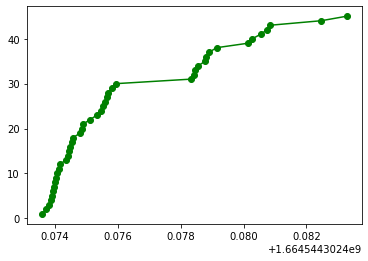

In [41]:
#Outcome with the plot
oCompany.hiring_plot(hired_list)

## Email Check

In [42]:
oEmployee.mail_check()

Invalid Email


## Salary Mean

In [43]:
oCompany = Company("World company")
try :
    oCompany, _, _ = hire_list_oEmployee(list_hired_oEmployee)
except Exception as exception :
    print("***ERROR : hire_list_oEmployee returned error = {}".format(exception))

Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Successfully hired
Successfully hired
Successfully hired
Already hired
Already hired
Successfully hired
Already hired
Already hired
Already hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired
Already hired
Successfully hired
Already hired
Already hired
Already hired
Successfully hired
Successfully hired

In [44]:
oCompany.salary_mean()# Should return a (float) value

6553.688888888889

## Other salaries statistics

In [45]:
try :
    oCompany.salary_stats()# Should return positive values
except Exception as exception :
    print("*** ERROR : calling salary_stats : {}".format(exception))

mean: 6553.688888888889
min: 2100.0
max: 24000.0
standard deviation: 4636.345341476635
median: 5800.0


## Salraries Histogram

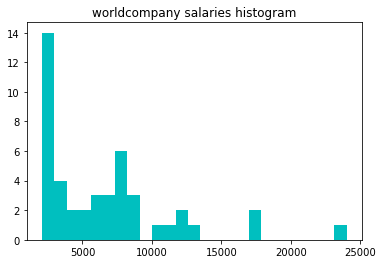

In [46]:
oCompany.salary_hist()

## Job Pie Chart

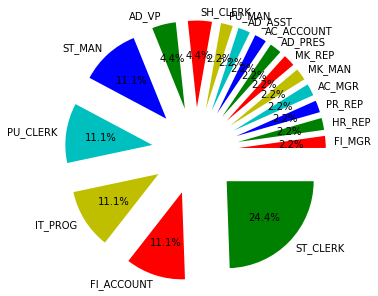

In [47]:
oCompany.job_pie(0.5)# 

## "Is employee" fuction

In [48]:
# Randomly pick employee from list of hired employees
oEmployee = random.sample(hired_list, 1)[0]
oCompany.is_employee(oEmployee) # Should return True

This employee works here


True

In [49]:
# Randomly pick employee from list of hired employees
oEmployee = random.sample(hired_list, 1)[0]
oCompany.is_employee(oEmployee) # Should return True

This employee works here


True

In [50]:
# Randomly pick employee from list of hired employees
oEmployee = random.sample(list_tohire_oEmployee, 1)[0]
oCompany.is_employee(oEmployee) # Should return True

This employee does not work here


False

## “Company” +/- “Employee”

> '+' for hire, '-' for fire

In [51]:
#random pick one employee in the tohire list
tEmployee = random.sample(list_tohire_oEmployee, 1)[0]
oCompany.is_employee(tEmployee) #check if him or her is hired

This employee does not work here


False

In [52]:
#use '+' to hire this employee
oCompany + tEmployee

Successfully hired


True

In [53]:
#hire again
oCompany + tEmployee

Already hired


False

In [54]:
#use fire function to fire this employee
oCompany.fire(tEmployee)

This employee is fired


True

In [55]:
#fire again
oCompany.fire(tEmployee)

This employee does not work here


False

In [56]:
#use '-' to fire this employee
oCompany - tEmployee

This employee does not work here


False

In [57]:
#hire him or her and use '-' to fire this employee
oCompany + tEmployee
oCompany - tEmployee

Successfully hired
This employee is fired


True